<a href="https://colab.research.google.com/github/mariumnour/Project-1/blob/main/finalThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive to access the CSV files
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path of the folder containing the CSV files on Google Drive
folder_path = '/content/drive/MyDrive/DataSets'

# Define the list of CSV files to load
file_names =['02-14-2018.csv',
              '02-21-2018.csv',
              '02-23-2018.csv',
              '03-01-2018.csv',
              '03-02-2018.csv']

# Load each CSV file into a dataframe, clean it, and split it into train and test sets
train_dfs = []
test_dfs = []
for file_name in file_names:
    file_path = f'{folder_path}/{file_name}'
    df = pd.read_csv(file_path, low_memory=False)
    
    # Remove rows with missing or invalid values
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    
    # Drop columns with constant or near-constant values
    constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
    df = df.drop(constant_cols, axis=1)
    
    # Drop rows with duplicated values
    df = df.drop_duplicates()

     # Delete half of the dataframe
    df = df.sample(frac=0.5, random_state=42)
    
    # Convert categorical features to numerical features
    cat_cols = [col for col in df.columns if df[col].dtype == 'object']
    for col in cat_cols:
        df[col] = pd.factorize(df[col])[0]
    
    # Split the dataframe into train and test sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    
    train_dfs.append(train_df)
    test_dfs.append(test_df)

# Concatenate all the train and test dataframes
train_df = pd.concat(train_dfs, axis=0)
test_df = pd.concat(test_dfs, axis=0)

# Save the new train and test dataframes to CSV files in your Google Drive
#train_df.to_csv('/content/drive/MyDrive/path/to/new_train_file.csv', index=False)
#test_df.to_csv('/content/drive/MyDrive/path/to/new_test_file.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print(train_df.isnull().sum())


Dst Port                  0
Protocol                  0
Timestamp                 0
Flow Duration             0
Tot Fwd Pkts              0
                     ...   
Fwd Pkts/b Avg      1571789
Fwd Blk Rate Avg    1571789
Bwd Byts/b Avg      1571789
Bwd Pkts/b Avg      1571789
Bwd Blk Rate Avg    1571789
Length: 80, dtype: int64


In [3]:
# Check which columns have null values
print(train_df.isnull().any())

# Remove all rows with null values
train_df.dropna(inplace=True)


Dst Port            False
Protocol            False
Timestamp           False
Flow Duration       False
Tot Fwd Pkts        False
                    ...  
Fwd Pkts/b Avg       True
Fwd Blk Rate Avg     True
Bwd Byts/b Avg       True
Bwd Pkts/b Avg       True
Bwd Blk Rate Avg     True
Length: 80, dtype: bool


In [4]:
# Check which columns have null values
print(test_df.isnull().any())

# Remove all rows with null values
test_df.dropna(inplace=True)


Dst Port            False
Protocol            False
Timestamp           False
Flow Duration       False
Tot Fwd Pkts        False
                    ...  
Fwd Pkts/b Avg       True
Fwd Blk Rate Avg     True
Bwd Byts/b Avg       True
Bwd Pkts/b Avg       True
Bwd Blk Rate Avg     True
Length: 80, dtype: bool


In [5]:
print(test_df.isnull().sum())

Dst Port            0
Protocol            0
Timestamp           0
Flow Duration       0
Tot Fwd Pkts        0
                   ..
Fwd Pkts/b Avg      0
Fwd Blk Rate Avg    0
Bwd Byts/b Avg      0
Bwd Pkts/b Avg      0
Bwd Blk Rate Avg    0
Length: 80, dtype: int64


In [6]:
display(train_df)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,CWE Flag Count,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg
298487,4,0,53,78894,6,4,5,5.0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147505,0,0,1841,53466,10,2,24,248.0,21,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
211926,2,1,7588,10266,3,4,64,76.0,23,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28267,2,1,7558,13693,3,4,4,102.0,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176994,2,1,2203,2890,3,4,27,107.0,24,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202315,2,1,993,2242,3,4,9,326.0,9,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133908,7147,0,21974,7062,2,10,5,5.0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170174,0,0,4589,3173,3,3,5,5.0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16907,2,1,15660,354,3,4,8,18.0,8,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Create a dictionary to map each attack type to its category
attack_category = {
    'DDoS': 'attack',
    'DoS': 'attack',
    'Web Attack - Brute Force': 'attack',
    'Bot': 'attack',
    'Infiltration': 'attack',
    'Web Attack - XSS': 'attack',
    'Web Attack - Sql Injection': 'attack',
    'PortScan': 'attack',
    'Benign': 'benign'
}

# Create a new column in the dataframe to store the attack category
train_df['attack_category'] = train_df['Label'].map(attack_category)
test_df['attack_category'] = test_df['Label'].map(attack_category)


In [8]:
# Drop the columns from the train and test dataframes
train_df = train_df.drop(["Timestamp"], axis=1)
test_df = test_df.drop(["Timestamp"], axis=1)


In [9]:
X_train = train_df.loc[:, ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y_train = train_df['Label']
X_test = test_df.loc[:, ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']]
y_test = test_df['Label']

In [10]:
df = pd.DataFrame.from_dict(attack_category, orient='index', columns=['count'])


In [11]:
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# # Define the input and target variables
# X = new_df.drop(['Label'], axis=1)
# y = new_df['Label']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.75


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
# Define the SVM classifier
svc = SVC(kernel='linear', C=1)

# Define the RFE feature selector
rfe = RFE(estimator=svc, n_features_to_select=10, step=1)

# Fit the RFE selector to the data 
rfe.fit(X_train, y_train)

# Print the selected features
print(X_train.columns[rfe.support])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Test the classifier on the testing data and print the accuracy score
accuracy = knn.score(X_test, y_test)
print(f'KNN accuracy score: {accuracy:.2f}')

In [13]:
from sklearn.decomposition import PCA

# Assume X_train is your training feature matrix
pca = PCA(n_components=10) # Create a PCA object with 10 components
X_train_pca = pca.fit_transform(X_train) # Apply PCA to the training data

# Assume X_test is your testing feature matrix
X_test_pca = pca.transform(X_test) # Apply PCA to the testing data using the same PCA object



In [14]:
# Assume pca is your PCA object
components = pca.components_

# Print the first 10 components
print(components[:10])


[[ 3.65111098e-01  3.25917911e-05  3.87002633e-05  4.15575747e-04
   3.77900950e-03  5.49137304e-03  7.59044335e-05  4.95370708e-03
   5.54716873e-03  3.22906862e-01  3.71753027e-01  3.45346662e-01
   2.56932565e-01  1.30327984e-01  2.83982141e-01  1.58167492e-01
   1.66284349e-01  1.75875905e-01  1.23252429e-01  5.70351473e-02
   9.92504510e-05  1.64076725e-04  3.70660120e-01  3.15125458e-01
   1.04757186e-04  1.01918886e-02  1.14920646e-02  1.14920646e-02
  -5.90994827e-08  1.53682887e-07  2.61516814e-06  2.62519148e-06
   1.30978704e-06 -5.12917071e-07  2.06227279e-09  2.61516814e-06
  -1.79682018e-06 -1.20885893e-04  3.34445791e-04  3.77900950e-03
   4.95370708e-03 -7.43797293e-11 -7.43797293e-11 -7.43797293e-11
  -7.43797293e-11 -7.43797293e-11 -7.43797293e-11  3.25917911e-05
   1.40897628e-03  3.87002633e-05  3.10606598e-03 -1.20885893e-04
   3.34445791e-04  1.34357675e-05 -3.16381784e-06  2.67641050e-02
   1.26475462e-02  2.61286151e-02  1.53692418e-02  4.90590161e-03
   1.35997

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model on the training data and evaluate on the testing data
history = model.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test))

# Print the final testing accuracy
score = model.evaluate(X_test_pca, y_test, verbose=0)
print('Testing accuracy:', score[1])


Epoch 1/10
4115/4115 [==============================] - 15s 3ms/step - loss: 382.0689 - accuracy: 0.6051 - val_loss: 6.0372 - val_accuracy: 0.5738
Epoch 2/10
4115/4115 [==============================] - 13s 3ms/step - loss: 5.9049 - accuracy: 0.6143 - val_loss: 2.0596 - val_accuracy: 0.7184
Epoch 3/10
4115/4115 [==============================] - 12s 3ms/step - loss: 1.0046 - accuracy: 0.6477 - val_loss: 1.0569 - val_accuracy: 0.7183
Epoch 4/10
4115/4115 [==============================] - 13s 3ms/step - loss: 0.9573 - accuracy: 0.6396 - val_loss: 0.7549 - val_accuracy: 0.5619
Epoch 5/10
4115/4115 [==============================] - 12s 3ms/step - loss: 0.9402 - accuracy: 0.6399 - val_loss: 0.6589 - val_accuracy: 0.6465
Epoch 6/10
4115/4115 [==============================] - 12s 3ms/step - loss: 0.9506 - accuracy: 0.6391 - val_loss: 0.8162 - val_accuracy: 0.6864
Epoch 7/10
4115/4115 [==============================] - 17s 4ms/step - loss: 0.9597 - accuracy: 0.6423 - val_loss: 1.0081 - val_

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a decision tree classifier on the reduced data
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


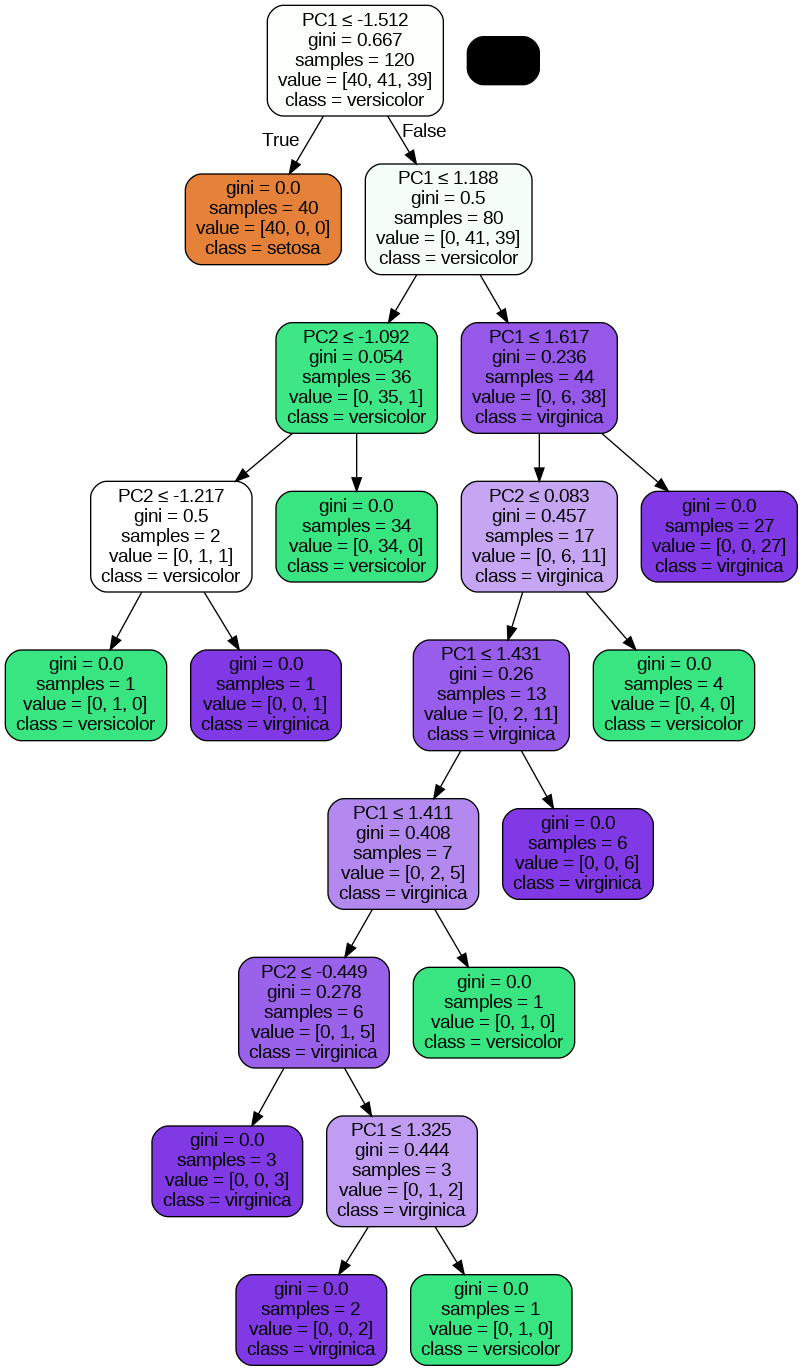

In [18]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=['PC1', 'PC2'],  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a KNN classifier on the reduced data
knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)

# Evaluate the model on the testing data
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train an SVM classifier on the reduced data
clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train)

# Evaluate the model on the testing data
accuracy = clf.score(X_test_pca, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9666666666666667


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.decomposition import PCA

# # Define the PCA and SVM models
# pca = PCA(n_components=50)
# svm = SVC(kernel='linear', C=1.0)

# # Create a pipeline that applies PCA followed by SVM
# model = Pipeline([('pca', pca), ('svm', svm)])

# # Fit the pipeline to the training data
# model.fit(X_train, y_train)

# # Predict the labels of the test data
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1-score: {f1:.2f}')


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Assume X_train_pca and y_train are your training feature matrix and target vector
# Assume X_test_pca and y_test are your testing feature matrix and target vector

# Create an SVM object with a linear kernel
clf = svm.SVC(kernel='linear')

# Train the SVM model
clf.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Define the input and target variables
# X = new_df.drop(['Label'], axis=1)
# y = new_df['Label']

# # Create a stratified 10-fold object
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# # Create a random forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Initialize an empty list to store the accuracy scores
# scores = []

# # Loop through the folds and fit the model
# for train_idx, test_idx in skf.split(X, y):
#     X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
#     X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
#     score = accuracy_score(y_test, y_pred)
#     scores.append(score)

# # Calculate and print the mean and standard deviation of the scores
# mean_score = sum(scores) / len(scores)
# std_score = np.std(scores)
# print(f'Mean cross-validation score: {mean_score:.2f}')
# print(f'Standard deviation of cross-validation scores: {std_score:.2f}')
